# Data Analysis - Crimes Cibernéticos relacionados a área da saúde

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

## Anlise das tabelas apresentadas no arquivo adquirido

In [3]:
tab = pd.read_csv('./breach_report.csv', low_memory=False, delimiter= ',', encoding = 'ISO-8859-1', decimal = '.')
tab.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/09,Theft,Paper/Films,No,A binder containing the protected health infor...
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/09,Theft,Network Server,No,Five desktop computers containing unencrypted ...
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/09,Theft,"Other, Other Portable Electronic Device",No,\N
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/09,Loss,Laptop,No,A laptop was lost by an employee while in tran...
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/09,Theft,Desktop Computer,No,A shared Computer that was used for backup was...


In [4]:
tab.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Individuals Affected', 'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description'],
      dtype='object')

In [84]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
Name of Covered Entity              1700 non-null object
State                               1689 non-null object
Covered Entity Type                 1658 non-null object
Individuals Affected                1677 non-null float64
Breach Submission Date              1700 non-null object
Type of Breach                      1686 non-null object
Location of Breached Information    1689 non-null object
Business Associate Present          1700 non-null object
Web Description                     1302 non-null object
dtypes: float64(1), object(8)
memory usage: 66.4+ KB


In [5]:
tab['Name of Covered Entity']

0                              Brooke Army Medical Center
1               Mid America Kidney Stone Association, LLC
2         Alaska Department of Health and Social Services
3       Health Services for Children with Special Need...
4                                       Mark D. Lurie, MD
5                                L. Douglas Carlson, M.D.
6                                      David I. Cohen, MD
7                                 Michele Del Vicario, MD
8                                     Joseph F. Lopez, MD
9                    City of Hope National Medical Center
10                The Children's Hospital of Philadelphia
11                                Cogent Healthcare, Inc.
12                 Democracy Data & Communications, LLC (
13                                    Kern Medical Center
14            Rick Lawson, Professional Computer Services
15      Detroit Department of Health and Wellness Prom...
16      Detroit Department of Health and Wellness Prom...
17            

In [6]:
tab.shape

(1700, 9)

In [7]:
tab.describe()

,Individuals Affected
count,1.677000e+03
mean,1.007082e+05
std,1.979060e+06
min,5.000000e+02
25%,1.000000e+03
50%,2.300000e+03
75%,7.526000e+03
max,7.880000e+07


In [8]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
Name of Covered Entity              1700 non-null object
State                               1689 non-null object
Covered Entity Type                 1658 non-null object
Individuals Affected                1677 non-null float64
Breach Submission Date              1700 non-null object
Type of Breach                      1686 non-null object
Location of Breached Information    1689 non-null object
Business Associate Present          1700 non-null object
Web Description                     1302 non-null object
dtypes: float64(1), object(8)
memory usage: 66.4+ KB


## construção dos gráficos base para análise

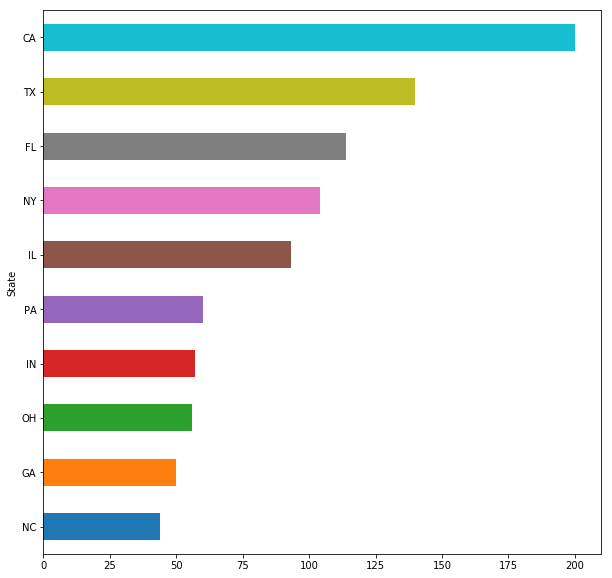

In [20]:
tab.groupby('State').size().sort_values().tail(10).plot(kind='barh', figsize=(10,10))

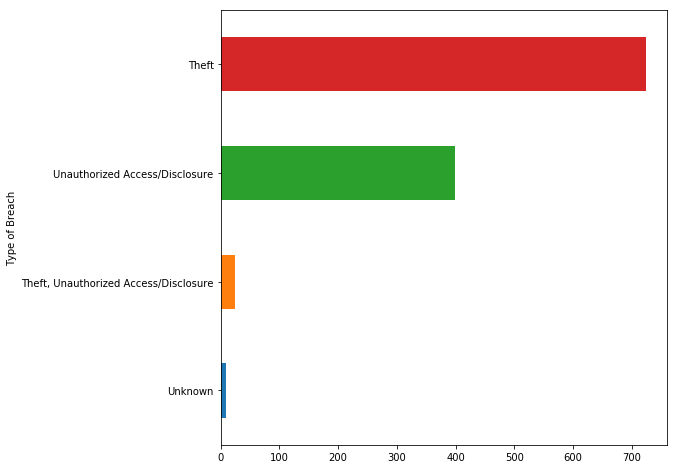

In [10]:
tab.groupby('Type of Breach').size().tail(4).sort_values().plot(kind='barh', figsize=(8, 8))

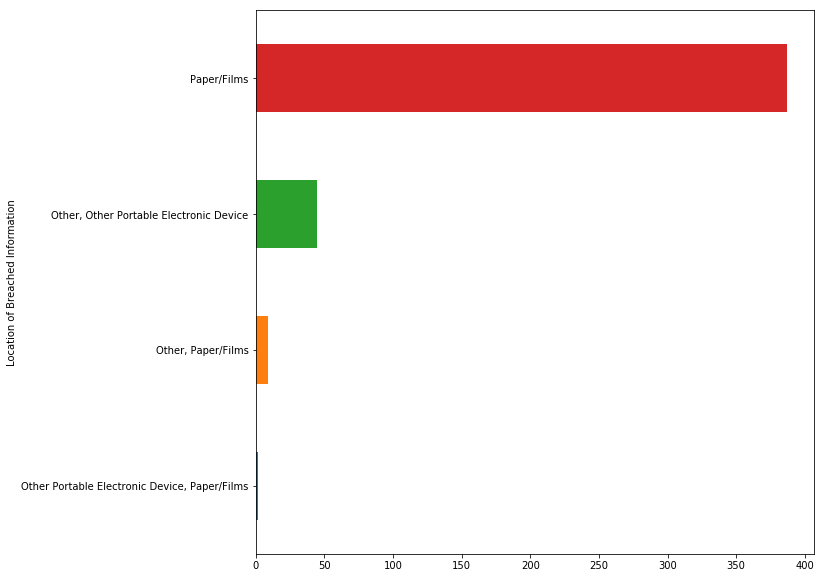

In [11]:
tab.groupby('Location of Breached Information').size().tail(4).sort_values().plot(kind='barh', figsize=(10,10))

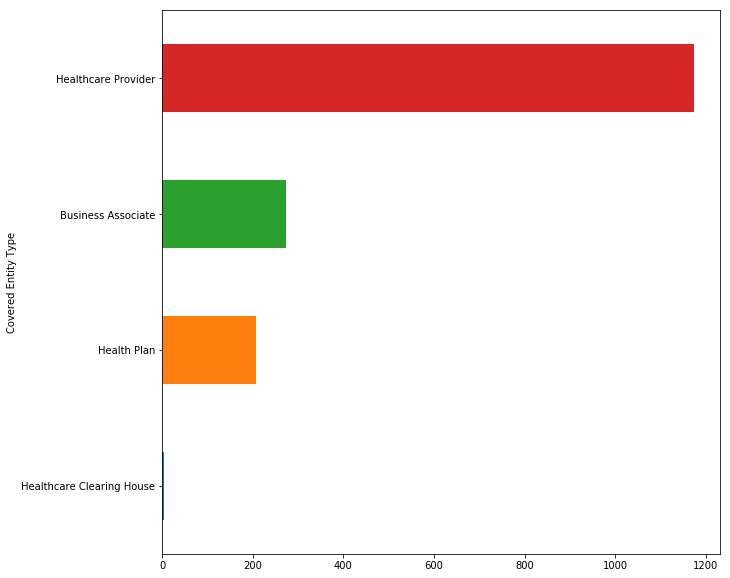

In [16]:
tab.groupby('Covered Entity Type').size().sort_values().plot(kind='barh', figsize=(10,10))

## Analise dos individuos

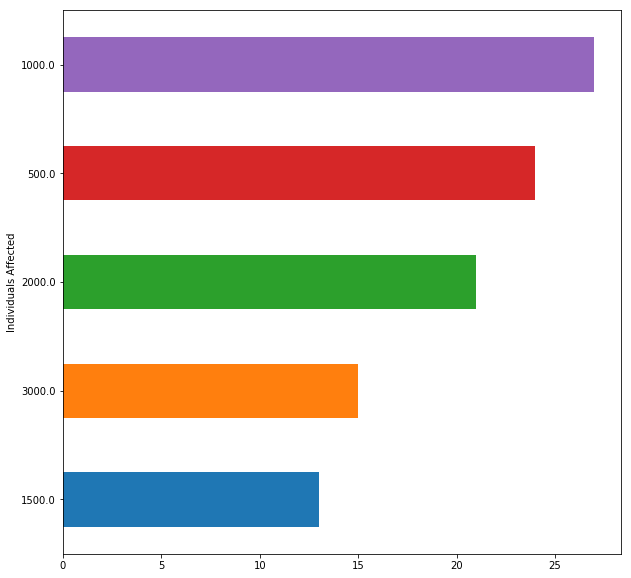

In [83]:
tab.groupby('Individuals Affected').size().sort_values().tail(5).plot(kind='barh', figsize=(10,10))

### Total de individuos afetados

In [94]:
tab['Individuals Affected'].sum(skipna = True)

168887690.0

## Analise das entidades

In [67]:
tab.groupby('Covered Entity Type').size().sort_values().tail(4)

Covered Entity Type
Healthcare Clearing House       4
Health Plan                   207
Business Associate            274
Healthcare Provider          1173
dtype: int64

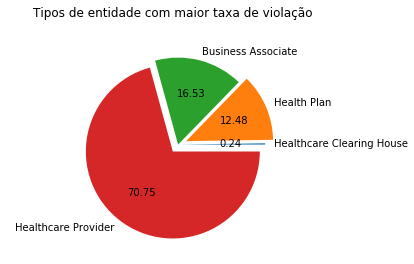

In [69]:
legendas = 'Healthcare Clearing House', 'Health Plan', 'Business Associate', 'Healthcare Provider'
plt.axis('equal')
plt.pie(tab['Covered Entity Type'].value_counts().sort_values(), autopct="%.2f", labels = legendas, explode = [0,0.1,0,0.1])     
plt.suptitle("Tipos de entidade com maior taxa de violação")

plt.show()

In [118]:
dt_f = tab.groupby(['Covered Entity Type', 'Name of Covered Entity']).apply(lambda x: x['Individuals Affected'].sum(skipna = True))

In [119]:
dt_f.describe()

count    1.523000e+03
mean     1.107320e+05
std      2.076638e+06
min      0.000000e+00
25%      1.000000e+03
50%      2.500000e+03
75%      8.204000e+03
max      7.880000e+07
dtype: float64

AttributeError: 'numpy.float64' object has no attribute 'plot'

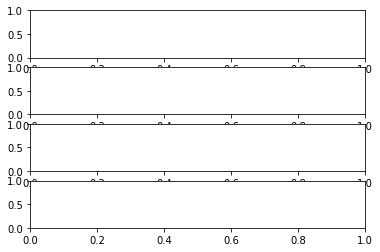

In [120]:
%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=1)
tipo = 'Healthcare Clearing House', 'Health Plan', 'Business Associate', 'Healthcare Provider'
for x in range(3):
    dt_f[x+1].plot().barh(ax = axes[x],figsize=(10,70),
                        title=(f'Individuos afetados na entidade: {tipo[x]}'))